# Happy Hotel Data Challenge
You've just joined the data team at a large hotelling chain. Your specific team is embedded in the CX (customer experience) division. Each day you receive hundreds of reviews of your 10 hotels from your customers. Each review consists of a free-form text review and a report of "happy" or "not happy". A product manager on your team wants to understand each hotel's performance at a more granular level; they want to build a product to identify topics within reviews. All of your reviews are unlabeled, and it's infeasible to label them by hand. <br>
Design and execute a method to identify topics within the reviews. For each topic, find a robust means of assigning a score to each hotel in that topic. For each of the ten hotels, what recommendations would you make to their general managers?

## Table of Contents:
Data cleaning<br>
Exploratory data analysis<br>
NLP on reviewer comments using NLTK and Scikit-learn<br>

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
import re 
%matplotlib inline

## load data, concatenate, and investigate basic characteristics

In [20]:
# use pandas to import data, this is a txt file but still takes commas as separates
happy=pd.read_csv(r'C:\Users\Laura\Documents\Insight 2019 Docs\hotel_happy_reviews.csv', sep=',',index_col=0)
nothappy=pd.read_csv(r'C:\Users\Laura\Documents\Insight 2019 Docs\hotel_not_happy_reviews.csv', sep=',',index_col=0)
reviews=pd.concat([happy, nothappy])

In [21]:
happy.head()

,Description,Is_Response,hotel_ID
User_ID,,,
id10329,Stayed here with husband and sons on the way t...,happy,8
id10331,We had - rooms. One was very nice and clearly ...,happy,3
id10333,My wife & I stayed in this glorious city a whi...,happy,3
id10334,My boyfriend and I stayed at the Fairmont on a...,happy,7
id10336,"Steps off Times Square, nice rooms, stayed - n...",happy,3


In [22]:
nothappy.head()

,Description,Is_Response,hotel_ID
User_ID,,,
id10326,The room was kind of clean but had a VERY stro...,not happy,3
id10327,I stayed at the Crown Plaza April -- - April -...,not happy,9
id10328,I booked this hotel through Hotwire at the low...,not happy,3
id10330,My girlfriends and I stayed here to celebrate ...,not happy,3
id10332,My husband and I have stayed in this hotel a f...,not happy,7


In [24]:
#check that there are as many user IDs as number of rows
reviews.index.nunique()

38932

In [25]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26521 entries, id10329 to id49257
Data columns (total 3 columns):
Description    26521 non-null object
Is_Response    26521 non-null object
hotel_ID       26521 non-null int64
dtypes: int64(1), object(2)
memory usage: 828.8+ KB


In [26]:
nothappy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12411 entries, id10326 to id49256
Data columns (total 3 columns):
Description    12411 non-null object
Is_Response    12411 non-null object
hotel_ID       12411 non-null int64
dtypes: int64(1), object(2)
memory usage: 387.8+ KB


In [18]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38932 entries, 0 to 12410
Data columns (total 4 columns):
User_ID        38932 non-null object
Description    38932 non-null object
Is_Response    38932 non-null object
hotel_ID       38932 non-null int64
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [37]:
# generate length of review
reviews['length'] = reviews['Description'].apply(len)

## EDA by review by hotel ID

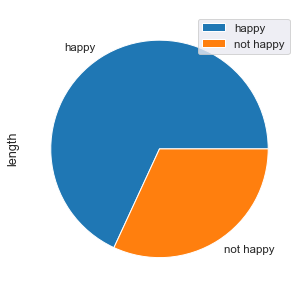

In [56]:
#plot of happy vs not happy
pies=reviews.groupby('Is_Response').count()
plot = pies.plot.pie(y='length', figsize=(5, 5))


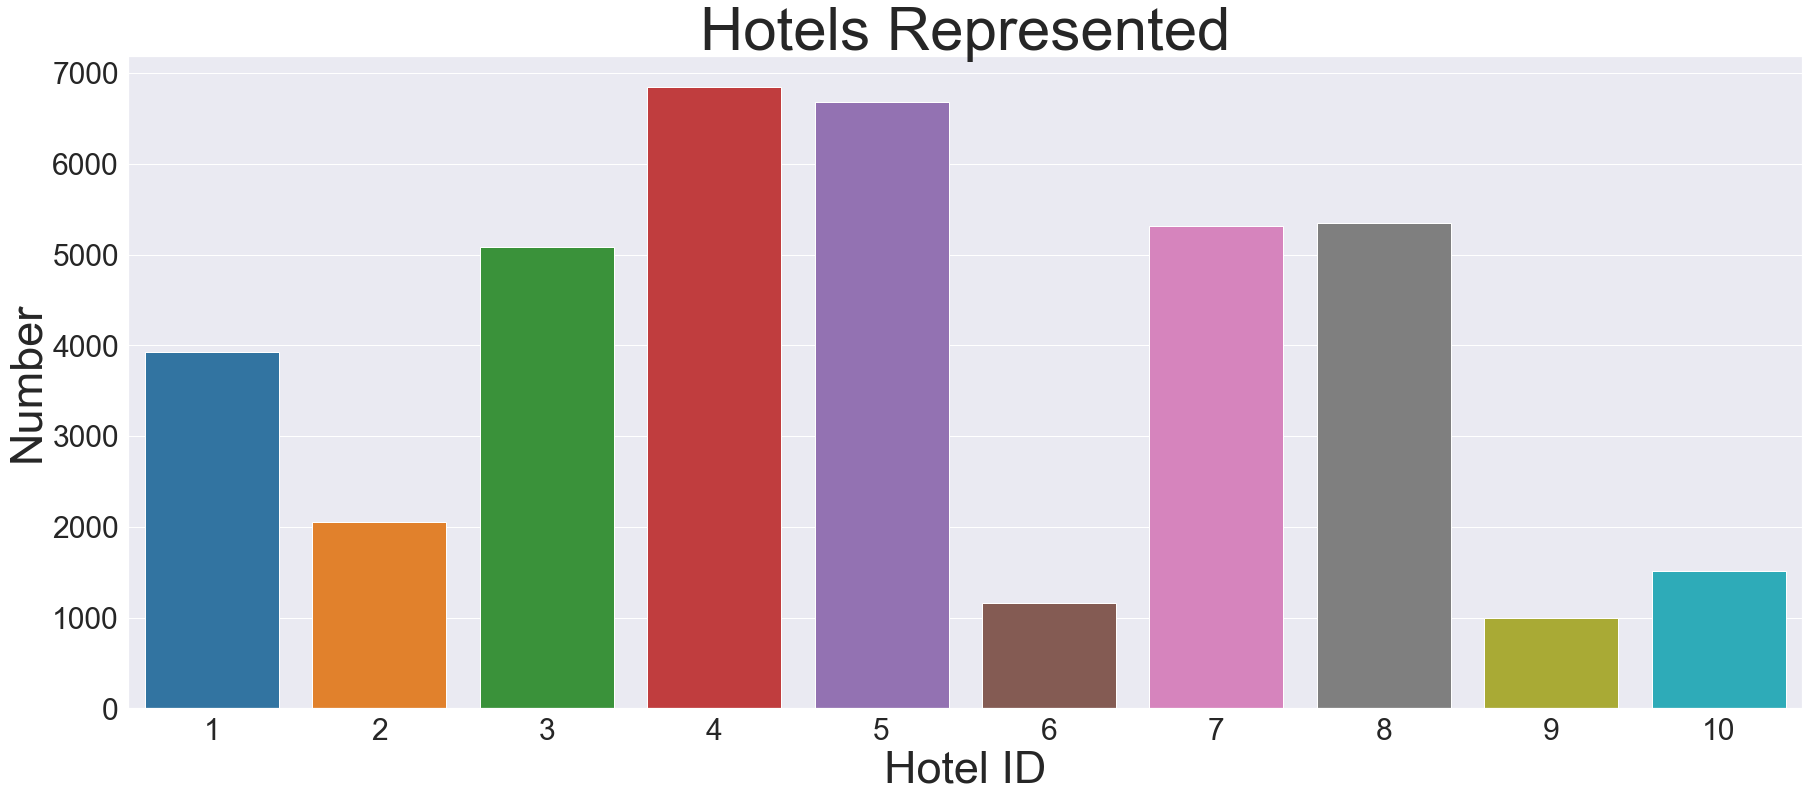

In [28]:
#countplot of hotels represented
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.05)
plt.figure(figsize=(30,12))
ax=sns.countplot(x='hotel_ID', data=reviews)
ax.set_title("Hotels Represented", fontsize=60)
ax.set_xlabel("Hotel ID", fontsize=45)
ax.set_ylabel("Number", fontsize=45)
ax.tick_params(labelsize=30)
plt.savefig("hotelid.png")

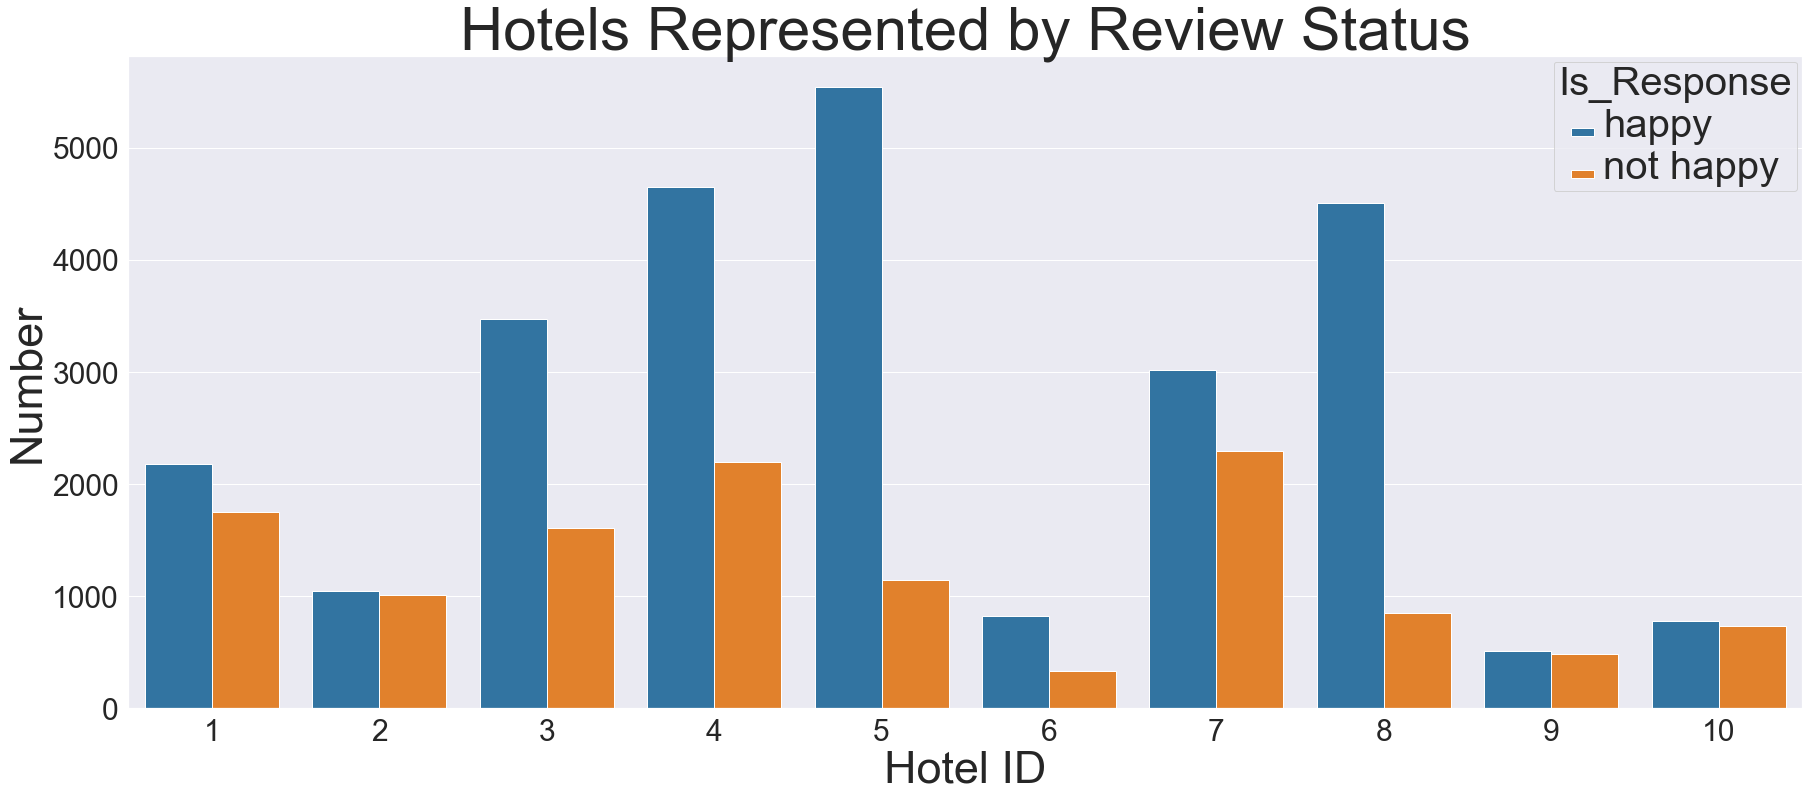

In [34]:
#countplot of hotels represented
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.05)
plt.figure(figsize=(30,12))
ax=sns.countplot(x='hotel_ID',hue='Is_Response', data=reviews)
ax.set_title("Hotels Represented by Review Status", fontsize=60)
ax.set_xlabel("Hotel ID", fontsize=45)
ax.set_ylabel("Number", fontsize=45)
plt.setp(ax.get_legend().get_texts(), fontsize='40') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='40') # for legend title
ax.tick_params(labelsize=30)
plt.savefig("hotel_happy.png")

In [43]:
#check out this other stuff
#median and mean length of review by happy/not happy
print("Median length of reviews by group")
print(reviews.groupby('Is_Response')['length'].median())
print("\n")
print("Mean length of reviews by group")
print(reviews.groupby('Is_Response')['length'].mean())

Median length of reviews by group
Is_Response
happy        616
not happy    827
Name: length, dtype: int64


Mean length of reviews by group
Is_Response
happy         786.122997
not happy    1042.553864
Name: length, dtype: float64


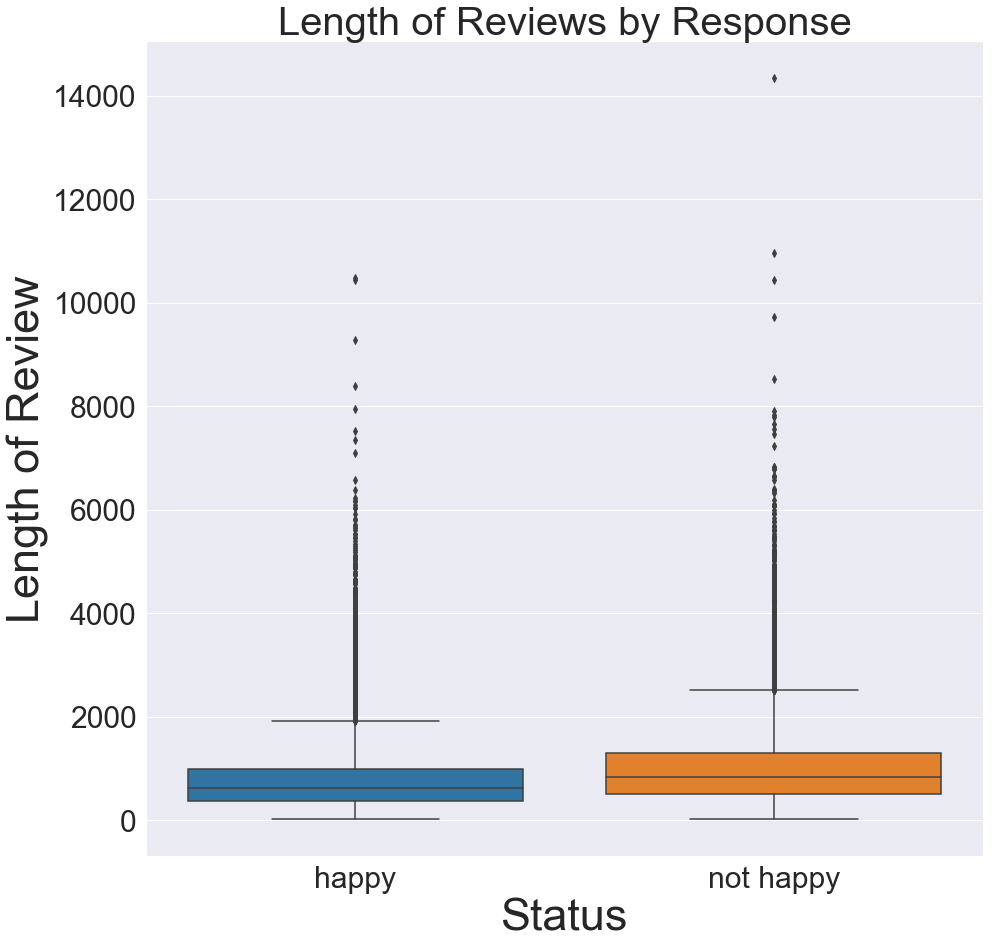

In [48]:
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.05)
plt.figure(figsize=(15,15))
ax=sns.boxplot(x="Is_Response", y="length",data=reviews)
ax.set_title("Length of Reviews by Response", fontsize=40)
ax.set_xlabel("Status", fontsize=45)
ax.set_ylabel("Length of Review", fontsize=45)
ax.tick_params(labelsize=30)
plt.savefig("len_boxplot.png")

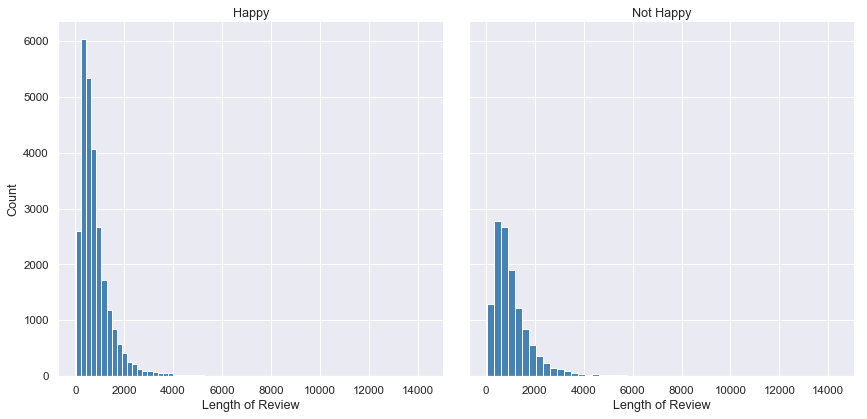

In [61]:
#length of review vs recommended or not
g = sns.FacetGrid(reviews, col="Is_Response", margin_titles=True, height=6)
bins = 50
g.map(plt.hist, "length", color="steelblue", bins=bins)
axes = g.axes.flatten()
axes[0].set_title("Happy")
axes[1].set_title("Not Happy")
axes[0].set_ylabel("Count")
for ax in axes:
    ax.set_xlabel("Length of Review")
plt.savefig("len_hist.png")

In [60]:
#exploratory look  at length
reviews.groupby('Is_Response')['length'].describe()

,count,mean,std,min,25%,50%,75%,max
Is_Response,,,,,,,,
happy,26521.0,786.122997,645.734294,20.0,368.0,616.0,991.0,10482.0
not happy,12411.0,1042.553864,833.261081,30.0,507.0,827.0,1308.0,14340.0


## Now getting into NLP with NLTK!
We will analyze the reviews. Special thanks to the Python for Data Science and Machine Learning Bootcamp by Jose Portilla at Udemy.com, since I used that lecture to set this up. <br>

Class link here: https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/overview

In [36]:
#get set up for NLP using NLTK
import nltk
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [68]:
print(reviews['Description'].iloc[111])  #check out a few full reviews to get a feeel for what they look like
print("\n")
print(reviews['Description'].iloc[535])
print("\n")
print(reviews['Description'].iloc[29999])
print("\n")
print(reviews['Description'].iloc[31090])
print("\n")
print(reviews['Description'].iloc[38901])

I had the most wonderful experience this morning with the Courtyard's """"""""""""""""""""""""""""""""Park & Fly"""""""""""""""""""""""""""""""" service. I am going to be out of town for almost a week, which gets really pricy when parking at the airport. I found the Courtyard's Park & Fly feature and am saving half of what I would be paying if I had parked at the airport! As soon as I arrived, the van was ready to take me to the airport so I probably got to the gate faster than if I had parked at the airport's long-term parking lot. The van driver was very nice and accommodating, too, dropping me off right at the curb of my airline (what a great service - especially if it's raining!). Thank you, Courtyard, for this wonderful service! I travel often and I will be utilizing this service again soon!


Great place for stay to hit the Northwest Highway @ --E area or Composite Drive area of Dallas


This hotel was very convenient (close to the airport) and gave us an inexpensive place to sta